In [1]:
from hyperparameters import *
import torch
from simple_UNet import UNet
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [3]:
PATH = r"results_dice/100epochs_0.001lr_20batch/network.pth"
#PATH = r"/Users/nianziyi/Desktop/Hair_Segmentation_Recoloring/simple_UNet/results_dice/20epochs_0.001lr_20batch/network.pth"
unet = UNet(in_channels=3,
            out_channels=1,
            n_class=1,
            kernel_size=3,
            padding=1,
            stride=1).to(device)

In [4]:
unet.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

In [24]:
acc = 0
batch_count = 0

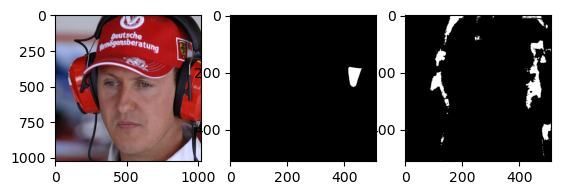

In [25]:
for x,y in test_loader:
    index = 10
    x = torch.permute(x, (0, 3, 1, 2))
    
    out = torch.squeeze(unet(x)) #output for compute test accuracy
    out_visual = out_to_mask(out[index]) #print one output result
    out_nograd = out_visual.detach().numpy()

    x = torch.permute(x, (0, 2, 3, 1))
    x_visual = x[index] #print one original image
    # x = x.detach().numpy()
    
    y_visual = torch.squeeze(y)[index] #print one original mask
    # y_1 = y_1.detach().numpy()
    
    plt.subplot(1,3,1)
    plt.imshow(x_visual)
    
    plt.subplot(1,3,2)
    plt.imshow(y_visual, cmap='gray')
    
    plt.subplot(1,3,3)
    plt.imshow(out_nograd, cmap='gray')

    '''
    print(out.shape)
    print(out_visual.shape)
    print(y.shape)
    print(y_visual.shape)
    print(x.shape)
    print(x_visual.shape)
    '''
    
    acc_temp = acc_fn(out, y, batch_size) #compute accuracy for each batch
    acc += acc_temp #add current batch accuracy
    batch_count += 1 #count number of batches in testset

In [26]:
acc

7.729019641876221

In [27]:
acc = acc / batch_count
print(acc)

0.8587799602084689


In [19]:
acc = acc_fn(out, y, batch_size)